
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining S&P 500 Sectors.  Construct portfolios from the S&P 500 Sector ETFs and examine the results of different weighting schemes.  In particular, we can select the best performing sectors over a given period.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['etf-galaxy']
risk_free_rate = 0
annual_returns = '1 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,SPY,S&P 500 ETF,US Stocks:Large Cap,10.17,-20.13,6.30,16.59,15.49,16.33,9.61,17.59,6.30,0.36
1,DIA,DJIA ETF,US Stocks:Large Cap,10.80,-17.45,1.13,10.91,13.02,12.22,7.70,17.95,1.13,0.06
2,QQQ,Nasdaq 100 ETF,US Stocks:Growth,-5.07,-35.19,-0.57,22.71,21.87,26.14,14.20,20.03,-0.57,-11.42
3,VTI,Vanguard Total Stock Market Index ETF,US Stocks:Total Stock Market,5.77,-22.16,1.93,15.53,14.77,17.32,10.17,18.24,1.93,0.11
4,IWM,Russell 2000 ETF,US Stocks:Small Cap,-16.34,-25.30,-11.30,9.11,9.43,20.54,11.88,23.37,-11.30,-264.08
5,MDY,S&P 400 Midcap ETF,US Stocks:Mid Cap,-14.81,-21.15,-3.41,11.25,10.58,17.15,10.45,21.78,-3.41,-74.27
6,IWD,Russell 1000 Value ETF,US Stocks:Value,24.90,-8.82,7.32,11.78,10.37,11.21,6.90,18.84,7.32,0.39
7,IWF,Russell 1000 Growth ETF,US Stocks,-1.41,-30.81,0.74,19.85,19.54,24.46,13.44,19.57,0.74,0.04
8,RSP,S&P 500 Equal Weight ETF,US Stocks,10.60,-14.75,6.00,14.55,13.33,13.85,7.80,20.18,6.00,0.30
9,SLY,S&P 600 Small Cap ETF,US Stocks:Small Cap,-24.71,-24.55,-3.85,11.26,10.95,18.31,10.58,23.58,-3.85,-90.78


In [6]:
# Sector Ranking
sector_rank = bb.rank(df, rank_by='Sharpe Ratio')
sector_rank = sector_rank[sector_rank['Description'].str.contains('Sector ETF')]
#sector_rank = sector_rank.loc[(sector_rank['3 mo'] > 0) & sector_rank['1 Yr'] > 0]
#sector_rank = rank_filtered.head(10)
sector_rank

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
14,XLE,S&P500 Energy Sector ETF,US Stocks:Energy,322.64,167.58,72.51,12.13,7.96,26.78,14.01,41.47,72.51,1.75
19,XLRE,S&P500 Real Estate Sector ETF,US Stocks:Real Estate,91.24,1.48,20.91,14.63,12.37,17.40,7.02,17.76,20.91,1.18
18,XLP,S&P500 Consumer Staples Sector ETF,US Stocks:Consumer Staples,131.63,10.54,13.67,14.02,10.09,8.98,3.27,13.75,13.67,0.99
21,XLV,S&P500 Healthcare Sector ETF,US Stocks:Healthcare,50.05,13.57,14.57,17.92,15.09,15.95,9.65,15.39,14.57,0.95
20,XLU,S&P500 Utilities Sector ETF,US Stocks:Utilities,124.92,40.57,14.09,12.54,11.12,12.78,5.80,17.23,14.09,0.82
12,XLB,S&P500 Materials Sector ETF,US Stocks:Materials,102.63,-2.21,8.21,17.11,13.59,13.64,6.34,21.52,8.21,0.38
15,XLF,S&P500 Financials Sector ETF,US Stocks:Financials,-38.78,-36.10,4.62,12.32,11.90,15.05,9.97,22.86,4.62,0.20
17,XLK,S&P500 Technology Sector ETF,US Stocks:Technology,-27.44,-36.18,3.08,25.18,24.37,26.46,14.99,20.73,3.08,0.15
22,XLY,S&P500 Consumer Discretionary Sector ETF,US Stocks:Consumer Discretionary,24.17,-33.34,-0.67,15.35,16.73,27.42,14.05,21.58,-0.67,-14.46
16,XLI,S&P500 Industrials Sector ETF,US Stocks:Industrials,-13.45,-22.42,-0.87,10.43,11.09,11.21,7.59,21.39,-0.87,-18.61


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# S&P 500 Sectors - top 4
top_sectors_portfolio = {
    'Title': 'Top S&P500 Sectors Portfolio'
}
top_sectors = list(sector_rank['Investment Option'])[:4]
top_sectors_portfolio.update(dict.fromkeys(top_sectors, 1/len(top_sectors)))

# S&P 500 Sectors - all
all_sectors_portfolio = {
    'Title': 'All S&P500 Sectors Portfolio'
}
all_sectors = list(sector_rank['Investment Option'])
all_sectors_portfolio.update(dict.fromkeys(all_sectors, 1/len(all_sectors)))

### Custom Portfolios

In [8]:
# my portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = all_sectors_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,XLE,XLRE,XLP,XLV,XLU,XLB,XLF,XLK,XLY,XLI,XLC,All S&P500 Sectors Portfolio
Annual Returns,72.51,20.91,13.67,14.57,14.09,8.21,4.62,3.08,-0.67,-0.87,-13.33,11.93
Std Dev,41.47,17.76,13.75,15.39,17.23,21.52,22.86,20.73,21.58,21.39,19.10,14.71
Sharpe Ratio,1.75,1.18,0.99,0.95,0.82,0.38,0.20,0.15,-14.46,-18.61,-254.60,0.81
Weight,0.05,0.10,0.22,0.07,0.12,0.11,0.07,0.05,0.05,0.09,0.06,1.00
Worst Typical Down Year,-10.43,-14.61,-13.83,-16.21,-20.37,-34.83,-41.10,-38.38,-43.83,-43.65,-51.53,-17.49
Black Swan,-51.90,-32.37,-27.58,-31.60,-37.60,-56.35,-63.96,-59.11,-65.41,-65.04,-70.63,-32.19


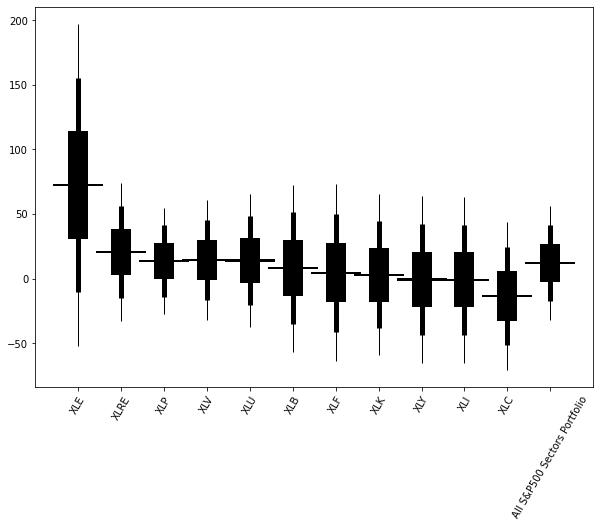

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

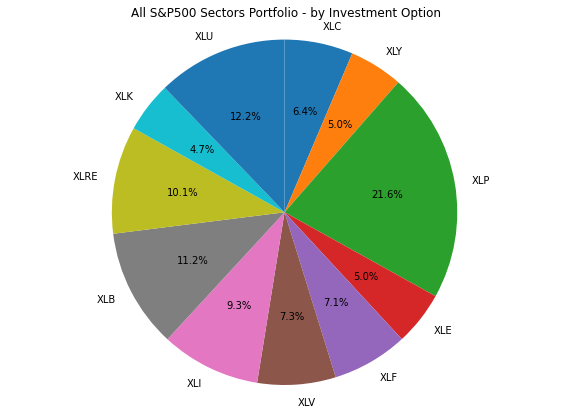

XLC    0.06
XLY    0.05
XLP    0.22
XLE    0.05
XLF    0.07
XLV    0.07
XLI    0.09
XLB    0.11
XLRE   0.10
XLK    0.05
XLU    0.12



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

All S&P500 Sectors Portfolio Weights:
    XLE                            0.0505
    XLRE                           0.1007
    XLP                            0.2163
    XLV                            0.0733
    XLU                            0.1219
    XLB                            0.1115
    XLF                            0.0709
    XLK                            0.0472
    XLY                            0.0503
    XLI                            0.0932
    XLC                            0.0641


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer...............

All S&P500 Sectors Portfolio Metrics:         
    max_sharpe_ratio                      1.89
    annual_return                        35.39
    std_dev                              18.70
    worst typical down year              -2.02
    black_swan                          -20.72


All S&P500 Sectors Portfolio Weights:
    XLE                            0.3500
    XLRE                           0.2300
    XLP                            0.2600
    XLV                            0.0300
    XLU                            0.0700
    XLB                            0.0300
    XLF                            0.0000
    XLK                            0.0000
    XLY                            0.0000
    XLI                            0.0300
    XLC                            0.0000



### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).